## Importing Dependencies


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Data Collection and Analysis

PIMA Diabetes Dataset

In [4]:
diabetes_dataset = pd.read_csv('diabetes.csv')

In [5]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#looking at the size
diabetes_dataset.shape

(768, 9)

In [7]:
#statiscal features
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
a=diabetes_dataset['Outcome'].value_counts()

In [10]:
a

Outcome
0    500
1    268
Name: count, dtype: int64

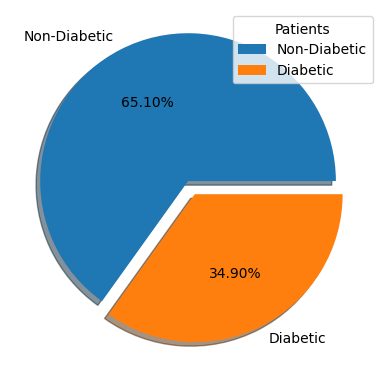

In [11]:
labels = {'Non-Diabetic':0,'Diabetic':2}
plt.pie(a,labels=labels,shadow=True,autopct='%1.2f%%',explode=[0.1,0])
plt.legend(title="Patients")
plt.show()

**Output Class Labels**

>0 -> Non-Diabetic

>1 -> Diabetic

In [12]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [13]:
#separating data and labels
X = diabetes_dataset.drop(columns = 'Outcome',axis=1)
Y = diabetes_dataset['Outcome']

In [14]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [15]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


##Data Standardization

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X)

StandardScaler()

In [21]:
standardized_data = scaler.transform(X)

c:\Users\91989\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
print(standardized_data)

[[-0.95180864 -3.7571036  -3.56486115 ... -4.03458073 -0.01022106
  -2.70705751]
 [-1.39275404 -3.81881281 -3.58089709 ... -4.14734019 -2.52764931
  -2.8446161 ]
 [-0.77543048 -3.7228207  -3.58624241 ... -4.20049822  0.40022919
  -2.83737617]
 ...
 [-1.03999772 -3.78355041 -3.56486115 ... -4.15378359 -3.49448769
  -2.85185602]
 [-1.39275404 -3.77865285 -3.59693304 ... -4.09096046 -2.54589154
  -2.72877728]
 [-1.39275404 -3.81097672 -3.57020646 ... -4.08612791 -2.85600951
  -2.9025355 ]]


In [23]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [24]:
print(X)
print(Y)

[[-0.95180864 -3.7571036  -3.56486115 ... -4.03458073 -0.01022106
  -2.70705751]
 [-1.39275404 -3.81881281 -3.58089709 ... -4.14734019 -2.52764931
  -2.8446161 ]
 [-0.77543048 -3.7228207  -3.58624241 ... -4.20049822  0.40022919
  -2.83737617]
 ...
 [-1.03999772 -3.78355041 -3.56486115 ... -4.15378359 -3.49448769
  -2.85185602]
 [-1.39275404 -3.77865285 -3.59693304 ... -4.09096046 -2.54589154
  -2.72877728]
 [-1.39275404 -3.81097672 -3.57020646 ... -4.08612791 -2.85600951
  -2.9025355 ]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Train Test Split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, stratify=Y, random_state=2 )

In [27]:
print(X.shape,X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [28]:

classifier = svm.SVC(kernel='linear')

In [29]:
#training the Support Vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## Model Evaluation

Accuray Score

In [30]:
#on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy of the training data is:', training_data_accuracy)

Accuracy of the training data is: 0.7247557003257329


In [31]:
#on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy of the test data is:', test_data_accuracy)

Accuracy of the test data is: 0.6753246753246753


## Making a Predictive System

In [32]:
patient_details = (5,166,72,19,175,25.8,0.587,51)
patient_details_as_numpy_array = np.asarray(patient_details)
patient_details_reshaped = patient_details_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(patient_details_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
  print('The person is not diabetic.')
else:
  print('The person is diabetic.')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic.


c:\Users\91989\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Saving the Model

In [25]:
import pickle

In [25]:
filename = 'diab_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [26]:
loaded_model = pickle.load(open('diab_model.sav','rb'))